In [1]:
from mtri_gmsh_helpers import *
import numpy as np
import netCDF4 as nc

In [2]:
geometry_filename = "/users/hasanm4/lore.scorec.rpi.edu/wsources/readOH2csg/tests/assets/box_case/xgc_mesh/geometry.nc"

ds = nc.Dataset(geometry_filename)

# check if the `ncells` variable exists in the dataset and has value 46
assert 'ncells' in ds.variables, "Variable 'ncells' not found in dataset."
ncells_value = ds.variables['ncells'][:]
assert ncells_value == 40, f"Expected 'ncells' to be 40, but got {ncells_value}."

In [3]:
surface_coeffs = ds.variables['surface_coeffs'][:]
cells = ds.variables['cells'][:]
boundaries = ds.variables['boundaries'][:]
surface_points = ds.variables['surface_points'][:]
zone_centers = ds.variables['zone_center'][:]
zone_min = ds.variables['zone_min'][:]
zone_max = ds.variables['zone_max'][:]
surfaces = ds.variables['surfaces'][:]
neighbors = ds.variables['neighbors'][:]

ds.close()

surface_coeffs = np.array(surface_coeffs)
cells = np.array(cells)
boundaries = np.array(boundaries)
surface_points = np.array(surface_points)
zone_centers = np.array(zone_centers)
zone_min = np.array(zone_min)
zone_max = np.array(zone_max)
surfaces = np.array(surfaces)
neighbors = np.array(neighbors)

Test assertions

In [4]:
assert cells.shape[0] == ncells_value + 1, f"Expected cells shape[0] to be {ncells_value + 1}, but got {cells.shape[0]}."
assert surface_coeffs.shape[0] == np.max(np.abs(boundaries)), f"Expected surface_coeffs shape[0] to be {np.max(np.abs(boundaries))}, but got {surface_coeffs.shape[0]}."

In [5]:
mesh = load_triangulation('unique_triangulation.pkl')

Triangulation loaded from unique_triangulation.pkl


Cell 2 boundaries: [ 0  6  2 64 65] with signs [ 1 -1 -1  1  1]


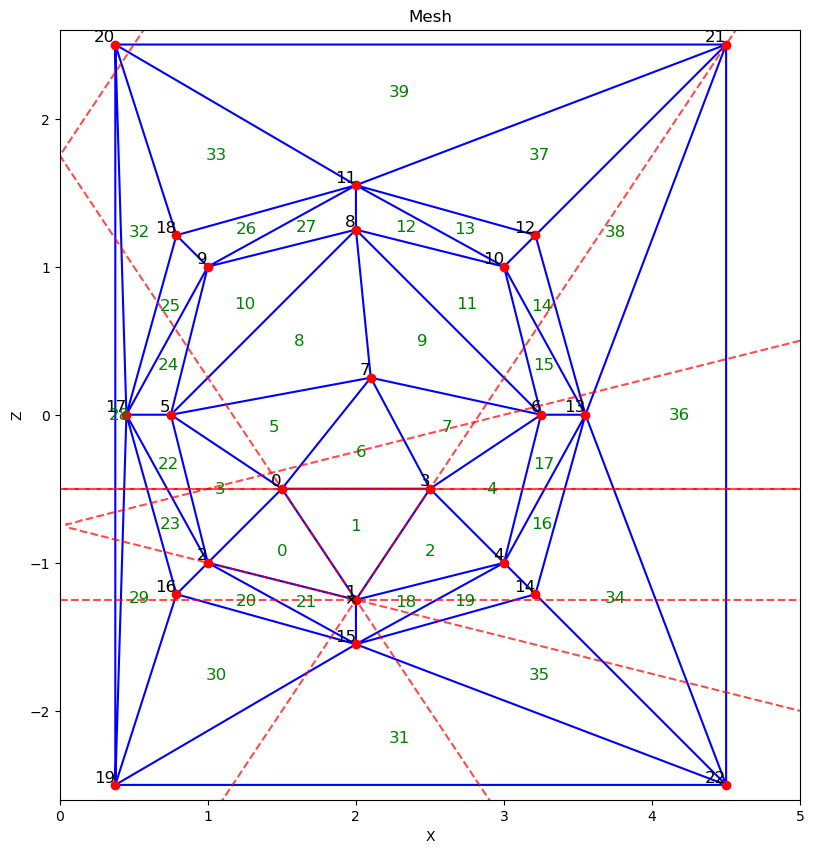

In [6]:
cell_id = 2
cell_boundary_ids, signs = get_cell_boundaries(cell_id, cells, boundaries)
print(f"Cell {cell_id} boundaries: {cell_boundary_ids} with signs {signs}")
fig, ax = plt.subplots()
plot_triangulation_with_labels(mesh, axis=ax)
for b_id in cell_boundary_ids:
    plot_quad_on_xz(surface_coeffs[b_id], (0,5), (-5,5), axis=ax)
    
plot_quad_on_xz(surface_coeffs[5], (0,5), (-5,5), axis=ax)

ax.plot(1.9695E+00, -1.2431E+00, 'kx', label='Cell Center')

flight_points = [
    [2.1353E+00, -1.1817E+00],
    [2.1288E+00, -1.2178E+00],
    [2.0768E+00, -1.5057E+00]
]
#ax.plot([pt[0] for pt in flight_points], [pt[1] for pt in flight_points], 'ro-', label='Flight Path')

ax.set_xlabel('X')
ax.set_ylabel('Z')
# equal axis scaling
ax.set_aspect('equal')
ax.set_xlim(0,5)
ax.set_ylim(-2.6,  2.6)
fig.set_size_inches(10, 10)
plt.show()

(array([3], dtype=int32), array([19], dtype=int32))


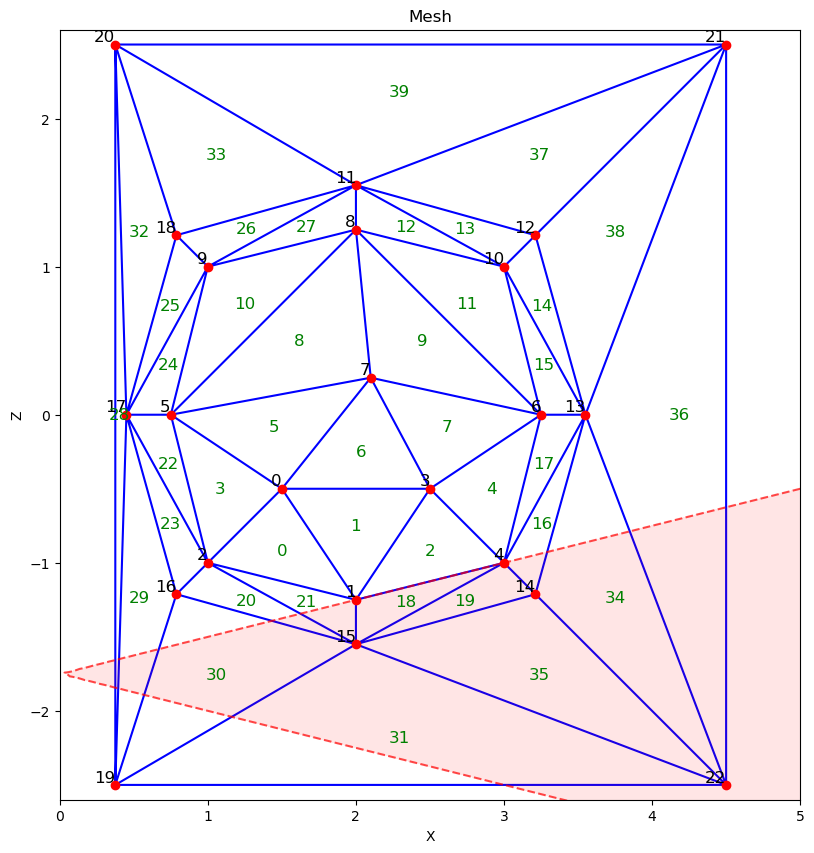

In [7]:
fig, ax = plt.subplots()
plot_triangulation_with_labels(mesh, axis=ax)

test_edge_id = 7
print(get_neighboring_cells(test_edge_id, surfaces, neighbors))
plot_quad_on_xz(surface_coeffs[test_edge_id], (0,5), (-5,5), axis=ax, sign=1)
    
#plot_quad_on_xz(surface_coeffs[12], (0,5), (-5,5))
ax.set_xlabel('X')
ax.set_ylabel('Z')
# equal axis scaling
ax.set_aspect('equal')
ax.set_xlim(0,5)
ax.set_ylim(-2.6,  2.6)
fig.set_size_inches(10, 10)
plt.show()

```text
 37 @m zn_type_max 4
 38 @m zn_undefined 0
 39 @m zn_vacuum 1
 40 @m zn_plasma 2
 41 @m zn_solid 3
 42 @m zn_exit 4
 ```

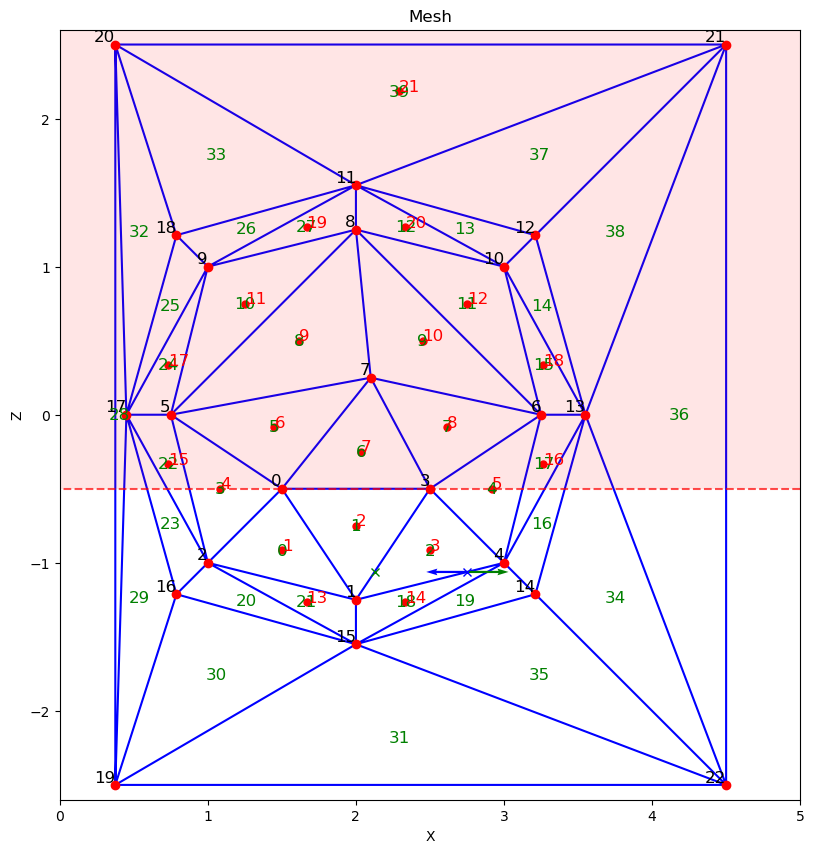

In [25]:
# plot zone centers
fig, ax = plt.subplots()
plot_triangulation_with_labels(mesh, axis=ax)

# print zone ids
for i, (x, z) in enumerate(zone_centers[:, [0, 2]]):
    ax.text(x, z, str(i+1), color='red', fontsize=12)

# plot dot at zone centers
ax.plot(zone_centers[:, 0], zone_centers[:, 2], 'ro', markersize=5)

#test_sufaces, test_signs = get_cell_boundaries(7, cells, boundaries)
# for s_id, sign in zip(test_sufaces[3:4], test_signs[3:4]):
#     print(f"Plotting surface {s_id} with sign {sign}")
#     plot_quad_on_xz(surface_coeffs[s_id], (0,5), (-5,5), axis=ax, sign=sign)
plot_quad_on_xz(surface_coeffs[65], (0,5), (-5,5), axis=ax, sign=-1)

flights_file = "/users/hasanm4/lore.scorec.rpi.edu/wsources/readOH2csg/tests/assets/box_case/xgc_mesh/flights1"
#plot_flight_path_from_flights_file(flights_file, axis=ax)

ax.quiver(2.7527144084781732,       -1.0618213978804567,        1.0000000000000000,        0.0000000000000000, width=0.003, color='green')
ax.quiver( 2.7527144497092300,       -1.0618213978804567,       -1.0000000000000000,       -0.0000000000000000, width=0.003, color='blue')
ax.plot(2.1254524014130287, -1.0618213978804567, 'gx')
ax.plot(2.7527144084781732, -1.0618213978804567, 'bx')
# ax.plot(0.275, -0.5, 'cx')
# ax.plot(0.875, -0.5, 'mx')

ax.set_xlabel('X')
ax.set_ylabel('Z')
# equal axis scaling
ax.set_aspect('equal')
ax.set_xlim(0,5)
ax.set_ylim(-2.6,  2.6)
fig.set_size_inches(10, 10)
plt.show()

2.7527144497092300       -1.0618213978804567
2.7527144497092300       -1.0618213978804567

In [9]:
get_cell_boundaries(2, cells, boundaries)

(array([ 0,  6,  2, 64, 65], dtype=int32),
 array([ 1, -1, -1,  1,  1], dtype=int32))

In [10]:
surface_coeffs[29]

array([-0.5625,  0.    ,  0.    ,  1.5   ,  0.0625,  0.0625, -1.    ,
        0.    ,  0.    ,  0.    ,  1.    ])

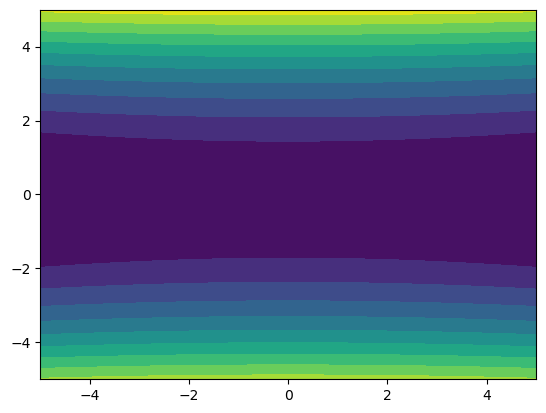

In [11]:
x_vals = np.linspace(-5, 5, 500)
z_vals = np.linspace(-5, 5, 500)

# plot the implicit contour where the quadric evaluates to zero
X, Z = np.meshgrid(x_vals, z_vals)
Y = np.zeros_like(X)
F = np.zeros_like(X)
for i in range(len(x_vals)):
    for j in range(len(z_vals)):
        point = (X[i,j], Y[i,j], Z[i,j])
        F[i,j] = abs(evaluate_dg2_quadric(surface_coeffs[20], point))

# Fill the region based on sign if provided
plt.contourf(X, Z, F, levels=10)

Assertion failed (flight.web): (zn_type(lc_zone(pt_loc(fl_origin(fx))))==zn_vacuum)||(zn_type(lc_zone(pt_loc(fl_origin(fx))))==zn_plasma)

In [12]:
origin_velocity_to_desmos_equation("1.9007860222759856       -1.1038257488788241        6.6158389453283173E-002   15435.183892203855       -53228.026728041346       -177902.10      936220086")

'(1.9007860222759856 + 15435.183892203855*t, -1.1038257488788241 + -53228.026728041346*t, 0.06615838945328317 + -177902.1*t)'